# ЛР №1. Дослiдження бiблiотек та фреймворкiв для комп’ютерної обробки зображень

Імпорт залежностей

In [3]:
import numpy as np
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

from lib.util.convolution import (
    apply_filter,
    apply_filter_mono,
    create_box_filter,
    conv,
    unsharp_masking,
    SOBEL_X,
    SOBEL_Y,
)
from src.definitions import RAW_DATA_FOLDER

2024-11-12 02:00:25.083425: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-11-12 02:00:25.083452: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2024-11-12 02:00:25.083480: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2024-11-12 02:00:25.083533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-12 02:00:25.083555: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Виконання роботи

1. Реалiзувати операцiю згортки для матрицi з нуля за допомогою NumPy.

In [4]:
A = np.array(
    [
        [45, 63, 27, 90, 34],
        [36, 18, 81, 9, 87],
        [9, 54, 72, 99, 56],
        [83, 23, 12, 43, 54],
        [27, 8, 19, 67, 69],
    ]
)

K = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

conv(A, (1 / 9) * K)

array([[45.        , 57.        , 61.66666667],
       [43.11111111, 45.66666667, 57.        ],
       [34.11111111, 44.11111111, 54.55555556]])

In [5]:
A = np.array(
    [
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
    ]
)

K = np.array([[0, 1], [2, 3]])

conv(A, K, padding=[(1, 1), (1, 1)])

array([[ 0.,  3.,  8.,  4.],
       [ 9., 19., 25., 10.],
       [21., 37., 43., 16.],
       [ 6.,  7.,  8.,  0.]])

In [6]:
A = np.array(
    [
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
    ]
)

K = np.array([[0, 1], [2, 3]])

conv(A, K, striding=(3, 2), padding=[(1, 1), (1, 1)])

array([[0., 8.],
       [6., 8.]])

2. Обрати будь-яке кольорове зображення. Зчитати його за допомогою бiблiотеки cv2 командою cv2.imread. Пам’ятайте, що колiрний простiр, у якому cv2.imread вiддає зображення, це BGR.

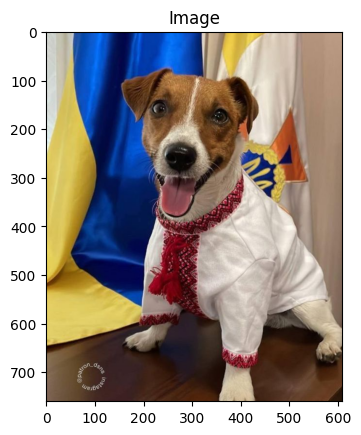

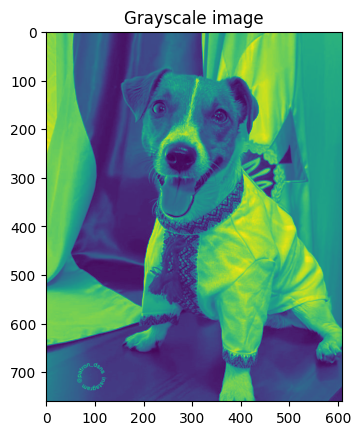

In [7]:
original_image = cv2.imread(RAW_DATA_FOLDER / "lab_1_1__image.png")
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

plt.imshow(image)
plt.title("Image")
plt.show()

plt.imshow(gray_image)
plt.title("Grayscale image")
plt.show()

3. Для подальшої роботи використовуйте фреймворк TensorFlow або PyTorch. Реалiзуйте наступнi пункти саме за допомогою фреймворку, не використовуйте NumPy. У випадку TensorFlow, перед роботою iз зображенням необхiдно перетворити тензор типу numpy.ndarray у tf.Tensor (з якими i працює TensorFlow).

In [6]:
image_tf = tf.convert_to_tensor(image, dtype=tf.float32)
gray_image_tf = tf.convert_to_tensor(gray_image, dtype=tf.float32)

4. Застосувати до зображення власний фiльтр Гауса, box-фiльтр, unsharp masking. Вiзуалiзувати результати. Зауважте, що для коректного застосування даних фiльтрiв до кольорового зображення необхiдно використовувати згортку по каналам (окремо для R, G та B у випадку кольорового простору RGB).

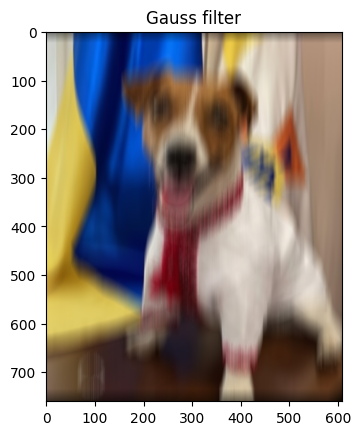

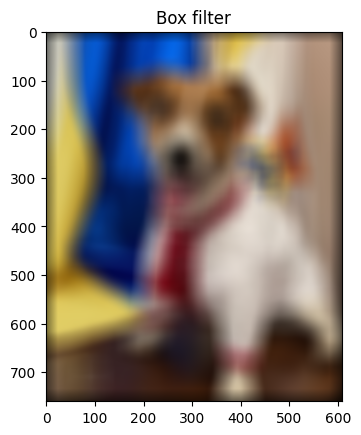

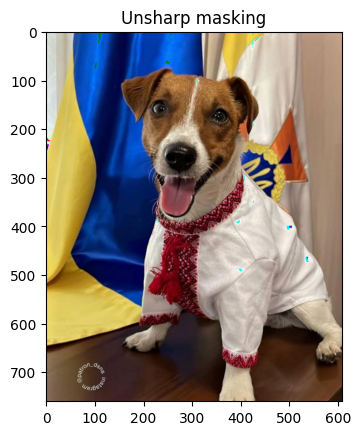

In [7]:
gauss_filter = tf.constant(cv2.getGaussianKernel(50, 50), dtype=tf.float32)
box_filter = tf.constant(create_box_filter(50), dtype=tf.float32)

gauss_filter_image = apply_filter(image_tf, gauss_filter)
box_filter_image = apply_filter(image_tf, box_filter)
unsharp_image = unsharp_masking(image_tf, box_filter_image, 0.1)

plt.imshow(gauss_filter_image)
plt.title("Gauss filter")
plt.show()

plt.imshow(box_filter_image)
plt.title("Box filter")
plt.show()

plt.imshow(unsharp_image)
plt.title("Unsharp masking")
plt.show()

5. По бажанню: виконати видiлення границь на зображеннi за допомогою оператору Собеля.

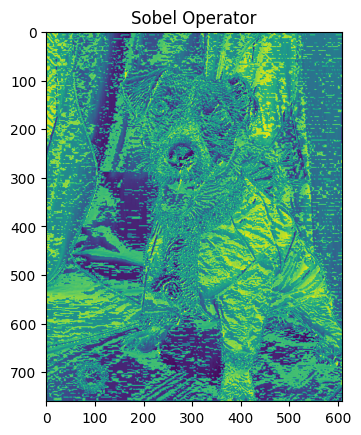

In [8]:
g_x = tf.cast(apply_filter_mono(gray_image_tf, SOBEL_X), dtype=tf.float32)
g_y = tf.cast(apply_filter_mono(gray_image_tf, SOBEL_Y), dtype=tf.float32)

sobel_image = tf.sqrt(tf.square(g_x) + tf.square(g_y))

plt.imshow(sobel_image)
plt.title("Sobel Operator")
plt.show()

6. Дослiдити варiанти нормалiзацiї зображення. Виконати min-max нормалiзацiю зображення, стандартизацiю зображення (image standardization).

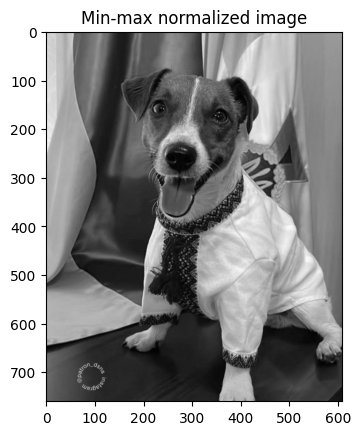

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.571359140652437..1.9703062038405763].


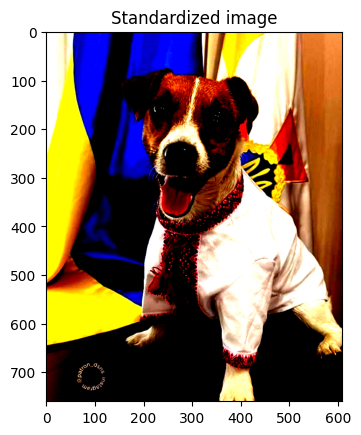

In [10]:
image_normalized = cv2.normalize(
    gray_image,
    None,
    alpha=0,
    beta=1,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_32F,
)

image_standardized = (image - np.mean(image)) / np.std(image)

plt.imshow(cv2.cvtColor(image_normalized, cv2.COLOR_BGR2RGB))
plt.title("Min-max normalized image")
plt.show()

plt.imshow(image_standardized)
plt.title("Standardized image")
plt.show()